## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
# df.info()
print('Null values:', df.isnull().sum().sum())

Null values: 0


In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


edible:  4208
poisonous:  3916


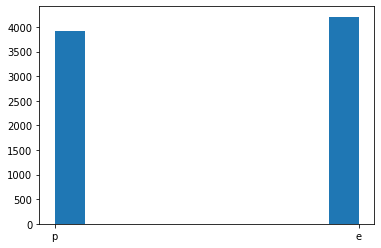

In [21]:
plt.hist(df['class']);
print('edible: ', len(df[df['class'] == 'e']))
print('poisonous: ', len(df[df['class'] == 'p']))

- data have no null values
- data is clean, have some missing values, but already detected and well encoded
- slightly imbalanced class, assume balanced

## Exploration

- missing values happens in feature __stalk-root__ (? = missing)
- the number is significant and the feature is not really insightful to differentiate the mushroom classes, except stalk-root 'r' will be good indication of edible class. For now, leave it as it be.

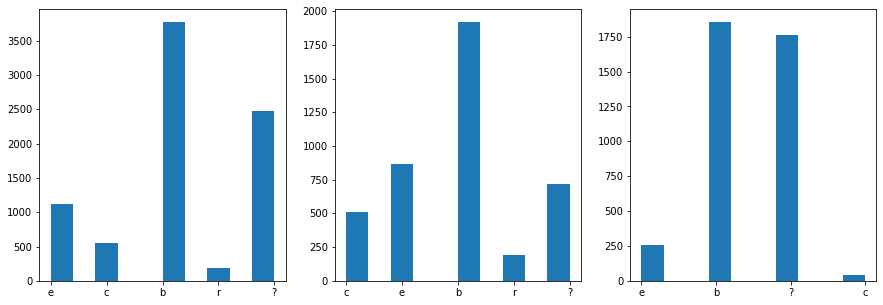

In [45]:
feature = 'stalk-root'

plt.figure(figsize=(15,5))
plt.subplot(131); plt.hist(df[feature]);
plt.subplot(132); plt.hist(df[df['class'] == 'e'][feature]);
plt.subplot(133); plt.hist(df[df['class'] == 'p'][feature]);

## Data preprocessing

- splitting data into train test data, choose 75%-25% train-test ratio
- since all features are categorical object and no ordinal, choose OneHot encoding
- encode target

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'],
                                                    test_size=0.25, random_state=999)

In [8]:
onehot = OneHotEncoder(categories='auto', drop=None, dtype=np.int8, handle_unknown='error')
onehot.fit(X_train)

OneHotEncoder(categorical_features=None, categories='auto', drop=None,
              dtype=<class 'numpy.int8'>, handle_unknown='error', n_values=None,
              sparse=True)

In [9]:
X_train = onehot.transform(X_train)
y_train = np.array(y_train.map({'e':0, 'p':1}))

In [23]:
print(X_train.shape)
print(y_train.shape)

(6093, 117)
(6093,)


In [ ]:
X_test = onehot.transform(X_test)
y_test = np.array(y_test.map({'e':0, 'p':1}))

In [24]:
print(X_test.shape)
print(y_test.shape)

(2031, 117)
(2031,)


## Model selection and train

- since dealing with sparse data

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\FadhelAdlansyah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluation

- plot confusion matrix to gives general information and roc_auc as asked
- review the train result, thus apply to test set

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

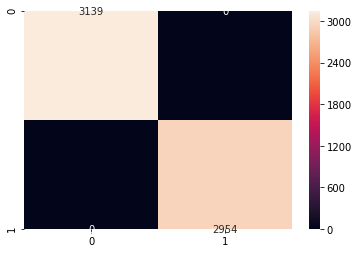

In [16]:
sns.heatmap(confusion_matrix(y_train, log_reg.predict(X_train)),
            annot=True, fmt="d");

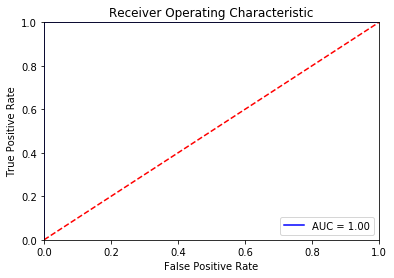

In [17]:
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict(X_train))
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

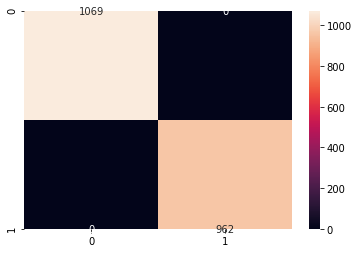

In [19]:
sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)),
            annot=True, fmt="d");

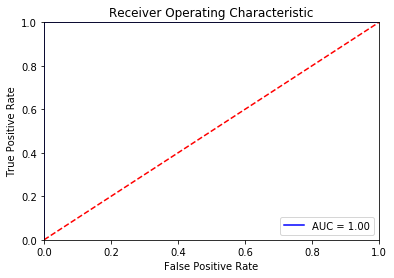

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- the result is too good both in training and test set, so it is not overfitting
- guess each class have some (not a few) distinct features that differ them from each other, since l2 penalty was used in the model

## Further exploration

In [59]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [33]:
onehot.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['?', 'b', 'c', 'e', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['p'], dtype=object),
 array(['n', 'o', 'w', 'y'], dtype=object),
 array(['n', 'o', 't'], dtype=object),
 array(['e', 'f', 'l', 'n', 'p'], dtype=object),
 array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=ob

In [56]:
cat_len = []
for cat in onehot.categories_:
    cat_len.append(len(cat))

n=0
for cl in cat_len:
    print(log_reg.coef_[0][n:n+cl])
    n=n+cl

[ 0.46136582  0.4027023  -0.11381267  0.05647864 -0.58712779 -0.13636079]
[-0.75334791  0.53400312  0.24697079  0.05561951]
[ 0.83285111 -0.77824796  0.02748072  0.03618436 -0.44968008  0.76127678
 -0.33094185 -0.23340828  0.45573981 -0.2380091 ]
[0.00383652 0.07940899]
[-2.78172941  2.68934812  2.65932003 -2.74432837  0.33468038 -3.99476892
  2.20414679  0.84911536  0.86746153]
[-0.10830355  0.19154906]
[ 1.54258564 -1.45934013]
[-2.0497316   2.13297711]
[ 1.85601757 -0.53479435 -0.03448111  0.11471206 -0.37080738 -0.62848226
 -0.09218257 -0.45031684  0.59593551 -0.21968464 -0.36937948  0.216709  ]
[ 0.65881454 -0.57556903]
[-0.49014859  2.33165703 -0.98312486  0.13877186 -0.91390994]
[-0.67932365  1.70390677 -1.07133027  0.12999266]
[-1.11456227  0.40641328 -0.46770449  1.25909898]
[ 0.20566119  0.33468038 -0.42199767 -0.3564002  -0.17930964 -0.29223353
  0.24716336 -0.02867957  0.57436119]
[ 0.14032228  0.33468038 -0.37418451 -0.29898428 -0.89490391 -0.29223353
  0.38239337  0.30399